# Exploring Swedish macroeconomic data 


We explore data for the Swedish economy. 

The data for the analysis is from the The Organization for Economic Cooperation and Development (OECD). The included variables are the unemployment rate, the central bank key interest rate, CPI, private consumption growth, government consumption growth, GDP growth and the constructed variable for  CPI, growth. The data set starts in 1990 Q1 and ends in 2020 Q1. It should be noted that Sweden went from a fixed exchange rate to a floating exchange rate in 1992.

Furthermore, we explore the relationship between the unemployment rate and the rate of inflation (based on the CPI).
Additionally, a Philips-curve is constructed to examine the relationship between the two variables for Sweden with the theoretical Philip’s curve in order to determine whether the Swedish economy aligns with macroeconomic theory.


Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%pip install matplotlib-venn
from matplotlib_venn import venn2
from statsmodels.tsa.statespace.sarimax import SARIMAX


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

from dataproject import plot_timeseries, phillips_curve, graph_combine



# Read and clean data

In [2]:
filename = 'data/Bachelor-data.xlsx' # open the file (read)
df = pd.read_excel(filename)
df.rename(columns={'Unnamed: 0':'year'}, inplace = True) # rename the unnamed year column to year (clean)



# Exploring the dataset 

To get a quick overview of the data, we show some **summary statistics** of the data we end up using for the plots and explanations. 

In [3]:
df[['Unemployment rate','Central bank key interest rate','CPI', 'Private consumption, growth','Government consumption, growth','GDP, growth']].describe()

,Unemployment rate,Central bank key interest rate,CPI,"Private consumption, growth","Government consumption, growth","GDP, growth"
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,7.774373,3.835950,0.819862,1.976088,1.116998,2.164594
std,2.152264,4.943223,0.095128,3.002315,2.553622,3.496295
min,1.834398,-0.500000,0.582506,-8.565919,-3.796196,-13.577965
25%,6.586716,0.750000,0.748994,0.311351,-0.366642,0.185637
50%,7.539960,2.900000,0.815023,2.102873,0.915401,2.652260
75%,8.570999,4.250000,0.912874,3.879584,2.606208,4.494419
max,12.423479,40.000000,0.979983,11.857397,14.569112,11.029760


**Note that the Consumer Price Index (CPI) is an index, where the index year 2021(Q3) is set equal to 1.**


We for example note that the key interest rate ranges from -0.5% to 40%, where 40% seems rather high. We also note that the average growth in GDP is around 2% (2.16%) which is expected. The average growth in private consumption is close to 2% (1.98%). So both GDP and private consumption appears to follow the same trend. 

Next we calculate the inflationrate and add it as a new column in the dataframe, which we will use later. 

In [4]:
df['CPI, growth'] = df['CPI'].diff() * 100

We start of by creating a Phillips curve for the Swedish economy. Below is the theoretical predection and the actucal Phillips curve. Lastly, we also combine the figures.

/Users/caspernielsen/Desktop/Uni/NumProg/projects-2023-hold-11/dataproject/dataproject.py:70: RuntimeWarning: divide by zero encountered in log
  inflation_rates = a + slope * np.log(unemployment_rates)


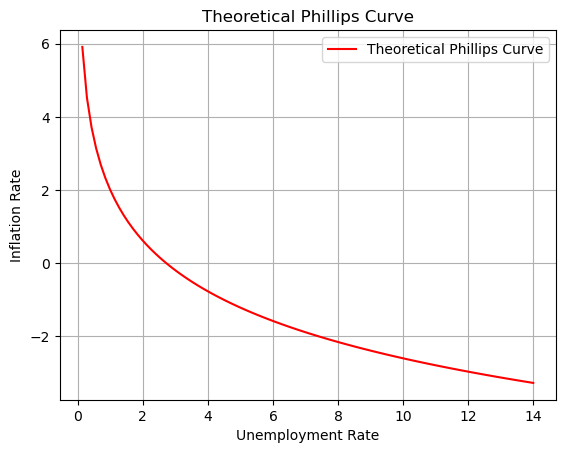

In [5]:
phillips_curve()


<Axes: title={'center': 'Swedish Phillips-curve 1990Q1-2020Q1'}, xlabel='Unemployment rate', ylabel='CPI, growth'>

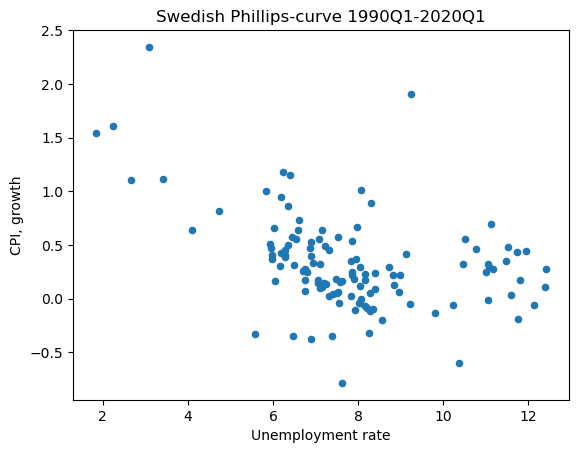

In [6]:
df.plot.scatter(x = 'Unemployment rate', y = 'CPI, growth',title='Swedish Phillips-curve 1990Q1-2020Q1')

It is immediately apperent that the theoretical predictions do not hold empirically. This specific result is well known and relates to the Lucas critique. Which just roughly states that we cannot take empirical relationships for granted. Attempts from central banks to exploit the theoretical relationship has let to a breakdown of the relationship.  

/Users/caspernielsen/Desktop/Uni/NumProg/projects-2023-hold-11/dataproject/dataproject.py:70: RuntimeWarning: divide by zero encountered in log
  inflation_rates = a + slope * np.log(unemployment_rates)


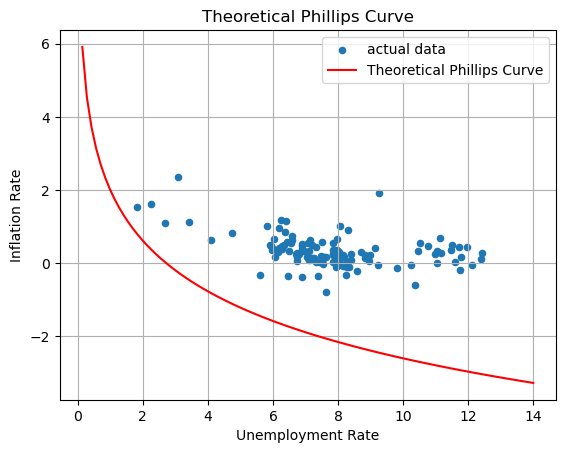

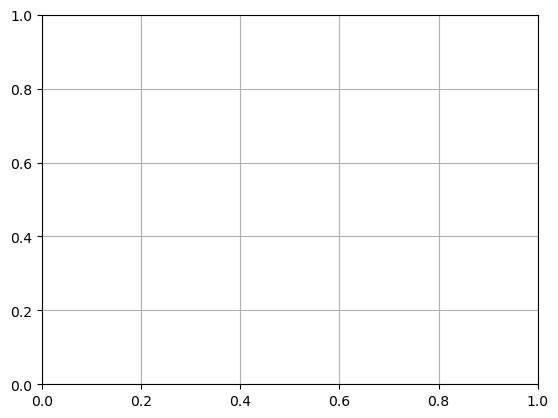

In [7]:
graph_combine(df)

As is seen from the combines plot, the theoretical prediction does not quite match the data.

# Next we make an interactive plot

In [8]:
# used to ignore a warning in the interactive plot below
import warnings
warnings.filterwarnings('ignore')

Below we make an interactive plot. The plot can take all variables in the dataframe, df. You can choose multiple variables at the same time by using the drop down menu. Choosing multiple values is done by using shift and/or ctrl (or command on mac) + enter.

In [9]:
# call the interactive plot using the dataframe, df.
plot_timeseries(df)

interactive(children=(SelectMultiple(description='variable', index=(3,), options=('Unemployment rate', 'Total …

- Selecting `Private consumption, growth` and `GDP, growth`, it is easy to see that `Private consumption, growth` is pro cyclical. Is is also noted that `GDP` appears more volatile than `private consumption`. This could suggest that consumers wish to smooth out their consumption, i.e. if their income falls by one unit, then their consumption falls by less than one unit.  
- Selecting `central bank key interest rate` and `GDP, growth`, their appears to be some inverse correlation, but is is not very strong. the inverse correlation appears strongest around 1992-1993 and around 2008.
- Selecting `Goverment consumption, growth` and `GDP, growth`. The correlation is not unambiguous. Around 1990 to 1991/92 the correlation appears inverse, same around 2008. Around 1999 and 2018 the co-movement seems strong. 

# Conclusion

We explored Swedish macro data using summary statistics and plots. The plots showed that the theoretical predections of the Phillips Curve does not hold using Swedish macro data. 

The intution that GDP growth and growth in private consumption does indeed hold, due to the co-movement.